In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from itertools import combinations

In [3]:
directory = 'scrapped_data/'
file = '20170101wellness20200701.json'

In [4]:
df = pd.read_json(directory+file)
df

,date,tags,title,author,claps,length,url
0,2017-01-01,"[mental-health, health, wellness, emotional, s...",How well are you? 8 Ways To Measure Your Well-...,Josephine Amoako,1,4,https://medium.com/@joseyphina/how-well-are-yo...
1,2017-01-02,"[fitness, health, wellness, weight, health-and...",How to Eat Healthy Foods on a Budget,Dacia Braxton,0,7,https://medium.com/@mensbodybuilding/how-to-ea...
2,2017-01-03,"[soul, wellness, peace, health]",Our health and wellness,Crown of Compassion,0,2,https://medium.com/@CrownofCompassion/our-heal...
3,2017-01-04,"[self-improvement, writing, self-awareness, we...",Wellness worksheets: a meditative writing aid,Laraine Domingo,2,3,https://medium.com/@brainoflaraine/wellness-wo...
4,2017-01-05,"[health, gluten, food, bread, wellness]",5 Reasons Why You’re Still Having Symptoms On ...,Mark Volmer,0,4,https://medium.com/@Flourish_Clinic/5-reasons-...
...,...,...,...,...,...,...,...
22596,2020-06-15,"[health, wellness, sleep, economy]",Can Better Sleep Habits Help Save The World Ec...,Dave Smurthwaite,87,3,https://medium.com/mindtrip/can-better-sleep-h...
22597,2020-06-15,"[health, food, nutrition, sustainability, well...",The Green Vegetable That’s Better Than Kale,Kirsten Oliver,0,3,https://medium.com/@kirstenoliverwriter/the-gr...
22598,2020-06-15,"[mental-health, marathon, workout, wellness, r...",Be Best with Unique Tips for Your First Marathon,Alex Petrov,0,1,https://medium.com/@alexpetrov1970/be-best-wit...
22599,2020-06-15,"[health, food, nutrition, wellness, diet]",Sugar Is Not Your Foe,Anna Nakhiengchanh,74,6,https://medium.com/coldpressed/sugar-is-not-yo...


'wellness' missing in some of these because it is misspelled. In others it is missing completely, but very few.

In [5]:
mask = ['wellness' not in tag for tag in df['tags']]
for tags in df[mask]['tags']:
    print(tags)

['corporate-culture', 'health', 'deploy', 'startup', 'entrepreneurship']
['bullying', 'fitnes', 'health', 'weight-los', 'wellnes']
['wellnes', 'immunity', 'yoga', 'short-story', 'mindfulnes']
['health', 'energy', 'wellnes', 'mindfulness', 'meditation']
['black-queer', 'blackhealingmatters', 'self-awareness', 'healing', 'yoga']
['health', 'productivity', 'mindfullness', 'wellnes', 'women']
['self-care', 'mental-health', 'health', 'wellnes', 'women']
['anxiety', 'panic-attack', 'mental-health', 'wellbeing']
['goals', 'productivity', 'snow', 'millennials', 'new-year']
['healthcare', 'digital-health', 'fda', 'wellnes', 'stephanie-bova']
['health', 'food', 'nutrition', 'gardening', 'wellnes']
['supplements', 'health', 'nutrition', 'wellnes', 'hormonal-health']
['healthcare', 'health', 'wellnes', 'politics', 'resistance']
['stretch', 'vacati', 'yoga', 'wellnes']
['mindfulnes', 'health', 'wellnes', 'meditation', 'pcos']
['self-care', 'holistic-health', 'spoonie', 'wellnes', 'chronic-illness']

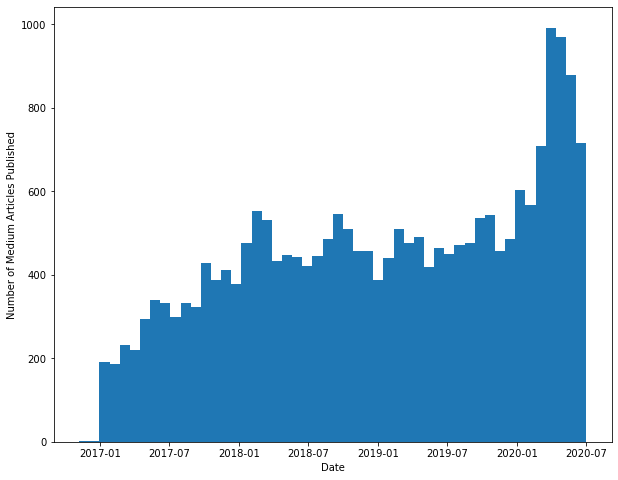

In [38]:
plt.figure(figsize=[10,8])
plt.hist(df['date'], bins=50)
plt.xlabel('Date')
plt.ylabel('Number of Medium Articles Published')
plt.show()

## Claps 

In [44]:
sorted(df['claps'],reverse=True)

[21554,
 17209,
 13874,
 12734,
 12719,
 12071,
 9894,
 8241,
 7589,
 7306,
 6227,
 6060,
 5886,
 5450,
 5382,
 5347,
 5227,
 5176,
 5104,
 5102,
 5096,
 4936,
 4904,
 4899,
 4682,
 4346,
 4313,
 4252,
 4113,
 4044,
 3977,
 3947,
 3911,
 3712,
 3635,
 3586,
 3571,
 3539,
 3534,
 3515,
 3451,
 3403,
 3357,
 3243,
 3241,
 3168,
 2877,
 2852,
 2699,
 2686,
 2656,
 2581,
 2577,
 2531,
 2510,
 2502,
 2491,
 2475,
 2474,
 2318,
 2225,
 2180,
 2088,
 2079,
 1966,
 1944,
 1942,
 1930,
 1858,
 1826,
 1824,
 1812,
 1807,
 1772,
 1753,
 1672,
 1615,
 1614,
 1580,
 1565,
 1545,
 1539,
 1535,
 1527,
 1517,
 1503,
 1490,
 1485,
 1481,
 1462,
 1454,
 1445,
 1432,
 1424,
 1404,
 1387,
 1383,
 1383,
 1363,
 1360,
 1353,
 1352,
 1350,
 1319,
 1318,
 1312,
 1311,
 1299,
 1292,
 1292,
 1287,
 1281,
 1270,
 1252,
 1248,
 1245,
 1243,
 1210,
 1196,
 1181,
 1180,
 1174,
 1172,
 1169,
 1168,
 1158,
 1153,
 1134,
 1129,
 1127,
 1124,
 1124,
 1097,
 1088,
 1087,
 1085,
 1084,
 1084,
 1074,
 1070,
 1070,
 1067,


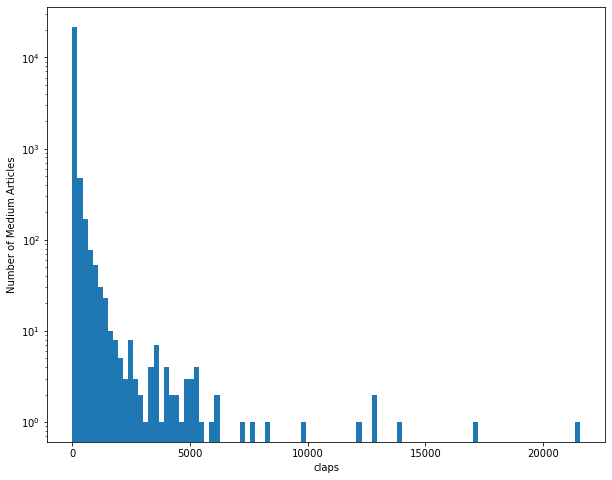

In [48]:
plt.figure(figsize=[10,8])
plt.hist(df['claps'], bins=100)
plt.semilogy()
plt.xlabel('claps')
plt.ylabel('Number of Medium Articles')
plt.show()

In [49]:
df['claps'][df['claps']>100]

24        107
217       118
275       168
331       880
488       163
         ... 
22457    1124
22531     637
22548     209
22560     198
22579     174
Name: claps, Length: 1788, dtype: int64

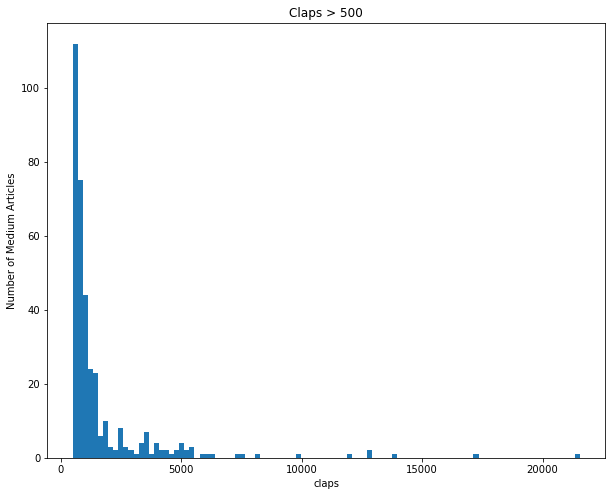

In [58]:
n = 500
plt.figure(figsize=[10,8])
plt.hist(df['claps'][df['claps']>n], bins=100)
# plt.semilogy()
plt.xlabel('claps')
plt.ylabel('Number of Medium Articles')
plt.title('Claps > {0}'.format(n))
plt.show()

## Length 

In [88]:
sorted(df['length'],reverse=True)

[51,
 48,
 37,
 35,
 35,
 34,
 31,
 31,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,


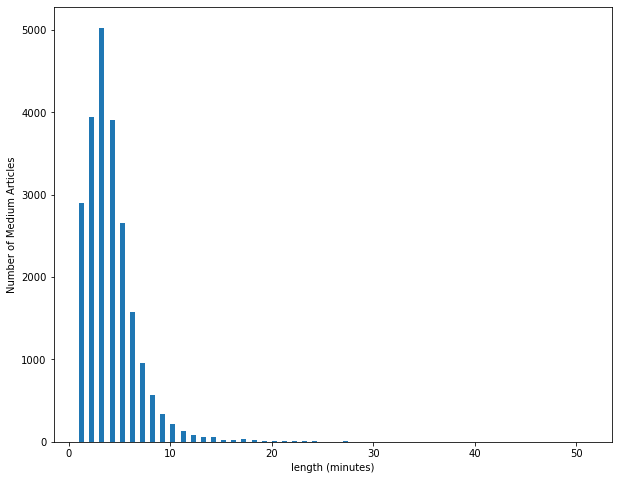

In [90]:
plt.figure(figsize=[10,8])
plt.hist(df['length'], bins=100)
# plt.semilogy()
plt.xlabel('length (minutes)')
plt.ylabel('Number of Medium Articles')
plt.show()

## Missing dates 

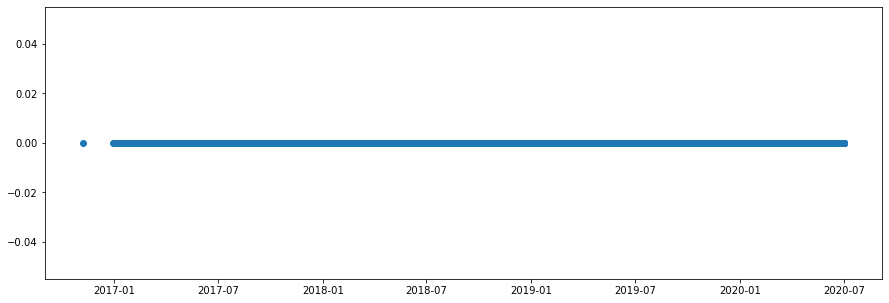

In [6]:
plt.figure(figsize=[15,5])
plt.scatter(df['date'], np.zeros(len(df)))
plt.show()

In [6]:
set(df['date'])

{20150122,
 20150127,
 20150202,
 20150205,
 20150209,
 20150212,
 20150214,
 20150216,
 20150224,
 20150225,
 20150226,
 20150304,
 20150310,
 20150311,
 20150312,
 20150318,
 20150319,
 20150321,
 20150324,
 20150326,
 20150329,
 20150331,
 20150403,
 20150410,
 20150414,
 20150415,
 20150416,
 20150420,
 20150424,
 20150429,
 20150501,
 20150502,
 20150505,
 20150507,
 20150510,
 20150511,
 20150512,
 20150513,
 20150514,
 20150515,
 20150516,
 20150520,
 20150524,
 20150527,
 20150529,
 20150614,
 20150619,
 20150622,
 20150710,
 20150717,
 20150826,
 20150907,
 20151007,
 20151013,
 20151015,
 20151030,
 20151111,
 20151116,
 20151128,
 20151209,
 20170717,
 20170727,
 20170814,
 20170816,
 20170902,
 20170903,
 20170909,
 20170912,
 20170914,
 20200420,
 20200428,
 20200429,
 20200430,
 20200501}

# Tag Frequency

In [7]:
list_of_tags_per_article = df['tags'].to_list()

In [8]:
all_tags = [tag for tags_in_article in list_of_tags_per_article for tag in tags_in_article ]

In [9]:
print('{0} total tags'.format(len(all_tags)))
print('{0} unique tags'.format(len(set(all_tags))))

106453 total tags
7230 unique tags


In [60]:
tags_count_list = Counter(all_tags).most_common()
# top_tags_counts = [tag for tag in tags_count_list if tag[1]>=500 ]
top_tags_counts = tags_count_list[:50]
top_tags = [pair[0] for pair in top_tags_counts]
top_counts = [pair[1] for pair in top_tags_counts]

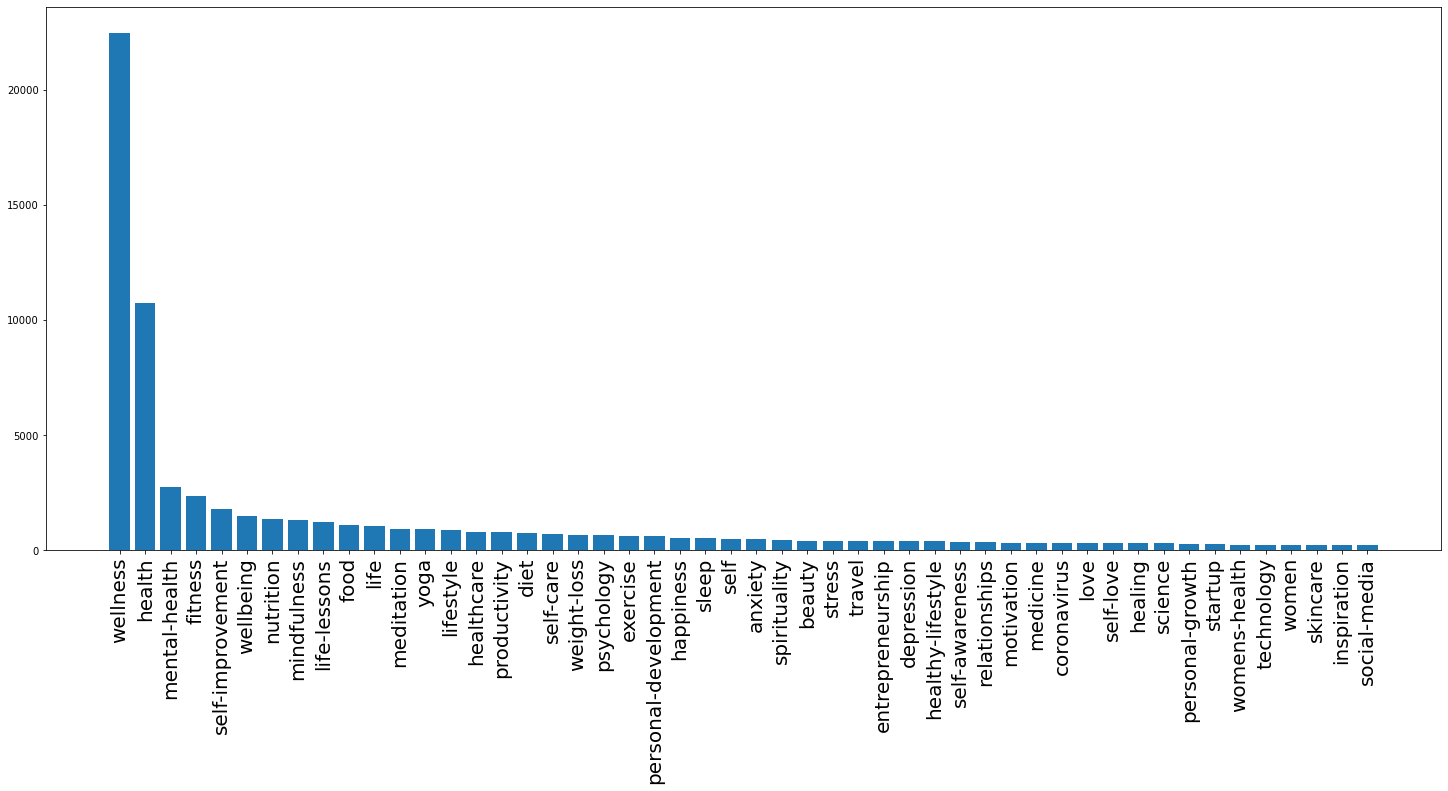

In [61]:
plt.figure(figsize=[25,10])
plt.bar(range(len(top_tags_counts)), top_counts)

plt.xticks(range(len(top_tags_counts)),top_tags, rotation='vertical', fontsize=20)
plt.show()

## WORDCLOUD 

In [22]:
from wordcloud import WordCloud, STOPWORDS

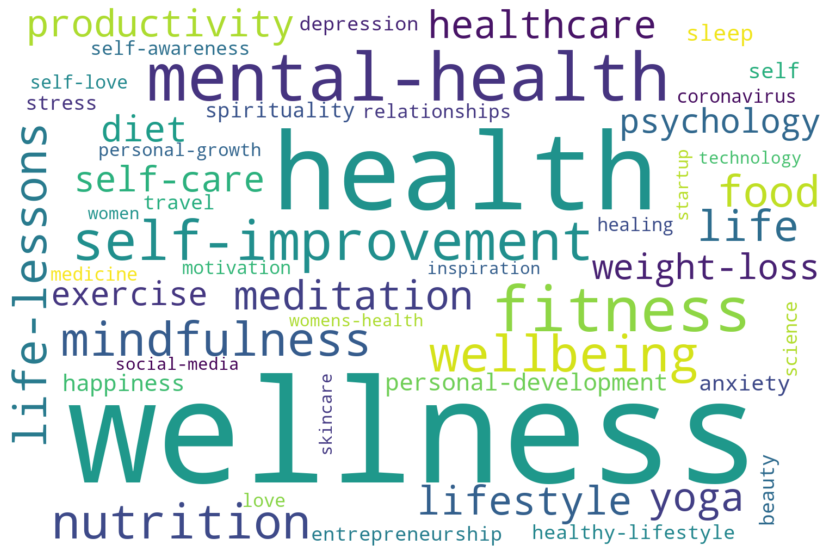

In [62]:
wordcloud = WordCloud(width=1500, height=1000, background_color='white')
wordcloud.fit_words(dict(top_tags_counts))
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## network viz 

In [63]:
import networkx as nx
G = nx.Graph()

In [64]:
# G.add_nodes_from(['wellness','healthcare','lifestyle','yoga'])
# G.add_nodes_from(top_tags)
for tag_count in top_tags_counts:
    G.add_node(tag_count[0], size=tag_count[1]/10)

In [65]:
G.nodes.data()

NodeDataView({'wellness': {'size': 2247.6}, 'health': {'size': 1073.6}, 'mental-health': {'size': 276.0}, 'fitness': {'size': 236.3}, 'self-improvement': {'size': 178.7}, 'wellbeing': {'size': 149.3}, 'nutrition': {'size': 136.6}, 'mindfulness': {'size': 131.9}, 'life-lessons': {'size': 122.0}, 'food': {'size': 110.0}, 'life': {'size': 106.0}, 'meditation': {'size': 94.2}, 'yoga': {'size': 90.8}, 'lifestyle': {'size': 89.6}, 'healthcare': {'size': 81.6}, 'productivity': {'size': 80.3}, 'diet': {'size': 73.7}, 'self-care': {'size': 70.4}, 'weight-loss': {'size': 67.7}, 'psychology': {'size': 64.3}, 'exercise': {'size': 61.0}, 'personal-development': {'size': 60.1}, 'happiness': {'size': 55.1}, 'sleep': {'size': 51.4}, 'self': {'size': 49.1}, 'anxiety': {'size': 48.0}, 'spirituality': {'size': 44.3}, 'beauty': {'size': 41.5}, 'stress': {'size': 41.3}, 'travel': {'size': 40.7}, 'entrepreneurship': {'size': 39.4}, 'depression': {'size': 38.9}, 'healthy-lifestyle': {'size': 38.3}, 'self-awa

In [66]:
for tag_list in list_of_tags_per_article:
    
    #keep only tags in top_tags
    tag_list = [tag for tag in tag_list if tag in top_tags]
#     print(tag_list)
    if len(tag_list)<2:
        continue
    else:
        combination_of_nodes = list(combinations(tag_list, 2))
        for edge in combination_of_nodes:
            if edge in G.edges:
                G.edges[edge]['frequency']+=1
                G.edges[edge]['inverse']=1/G.edges[edge]['frequency']
            else:
                G.add_edge(*edge, frequency=1, inverse=1)

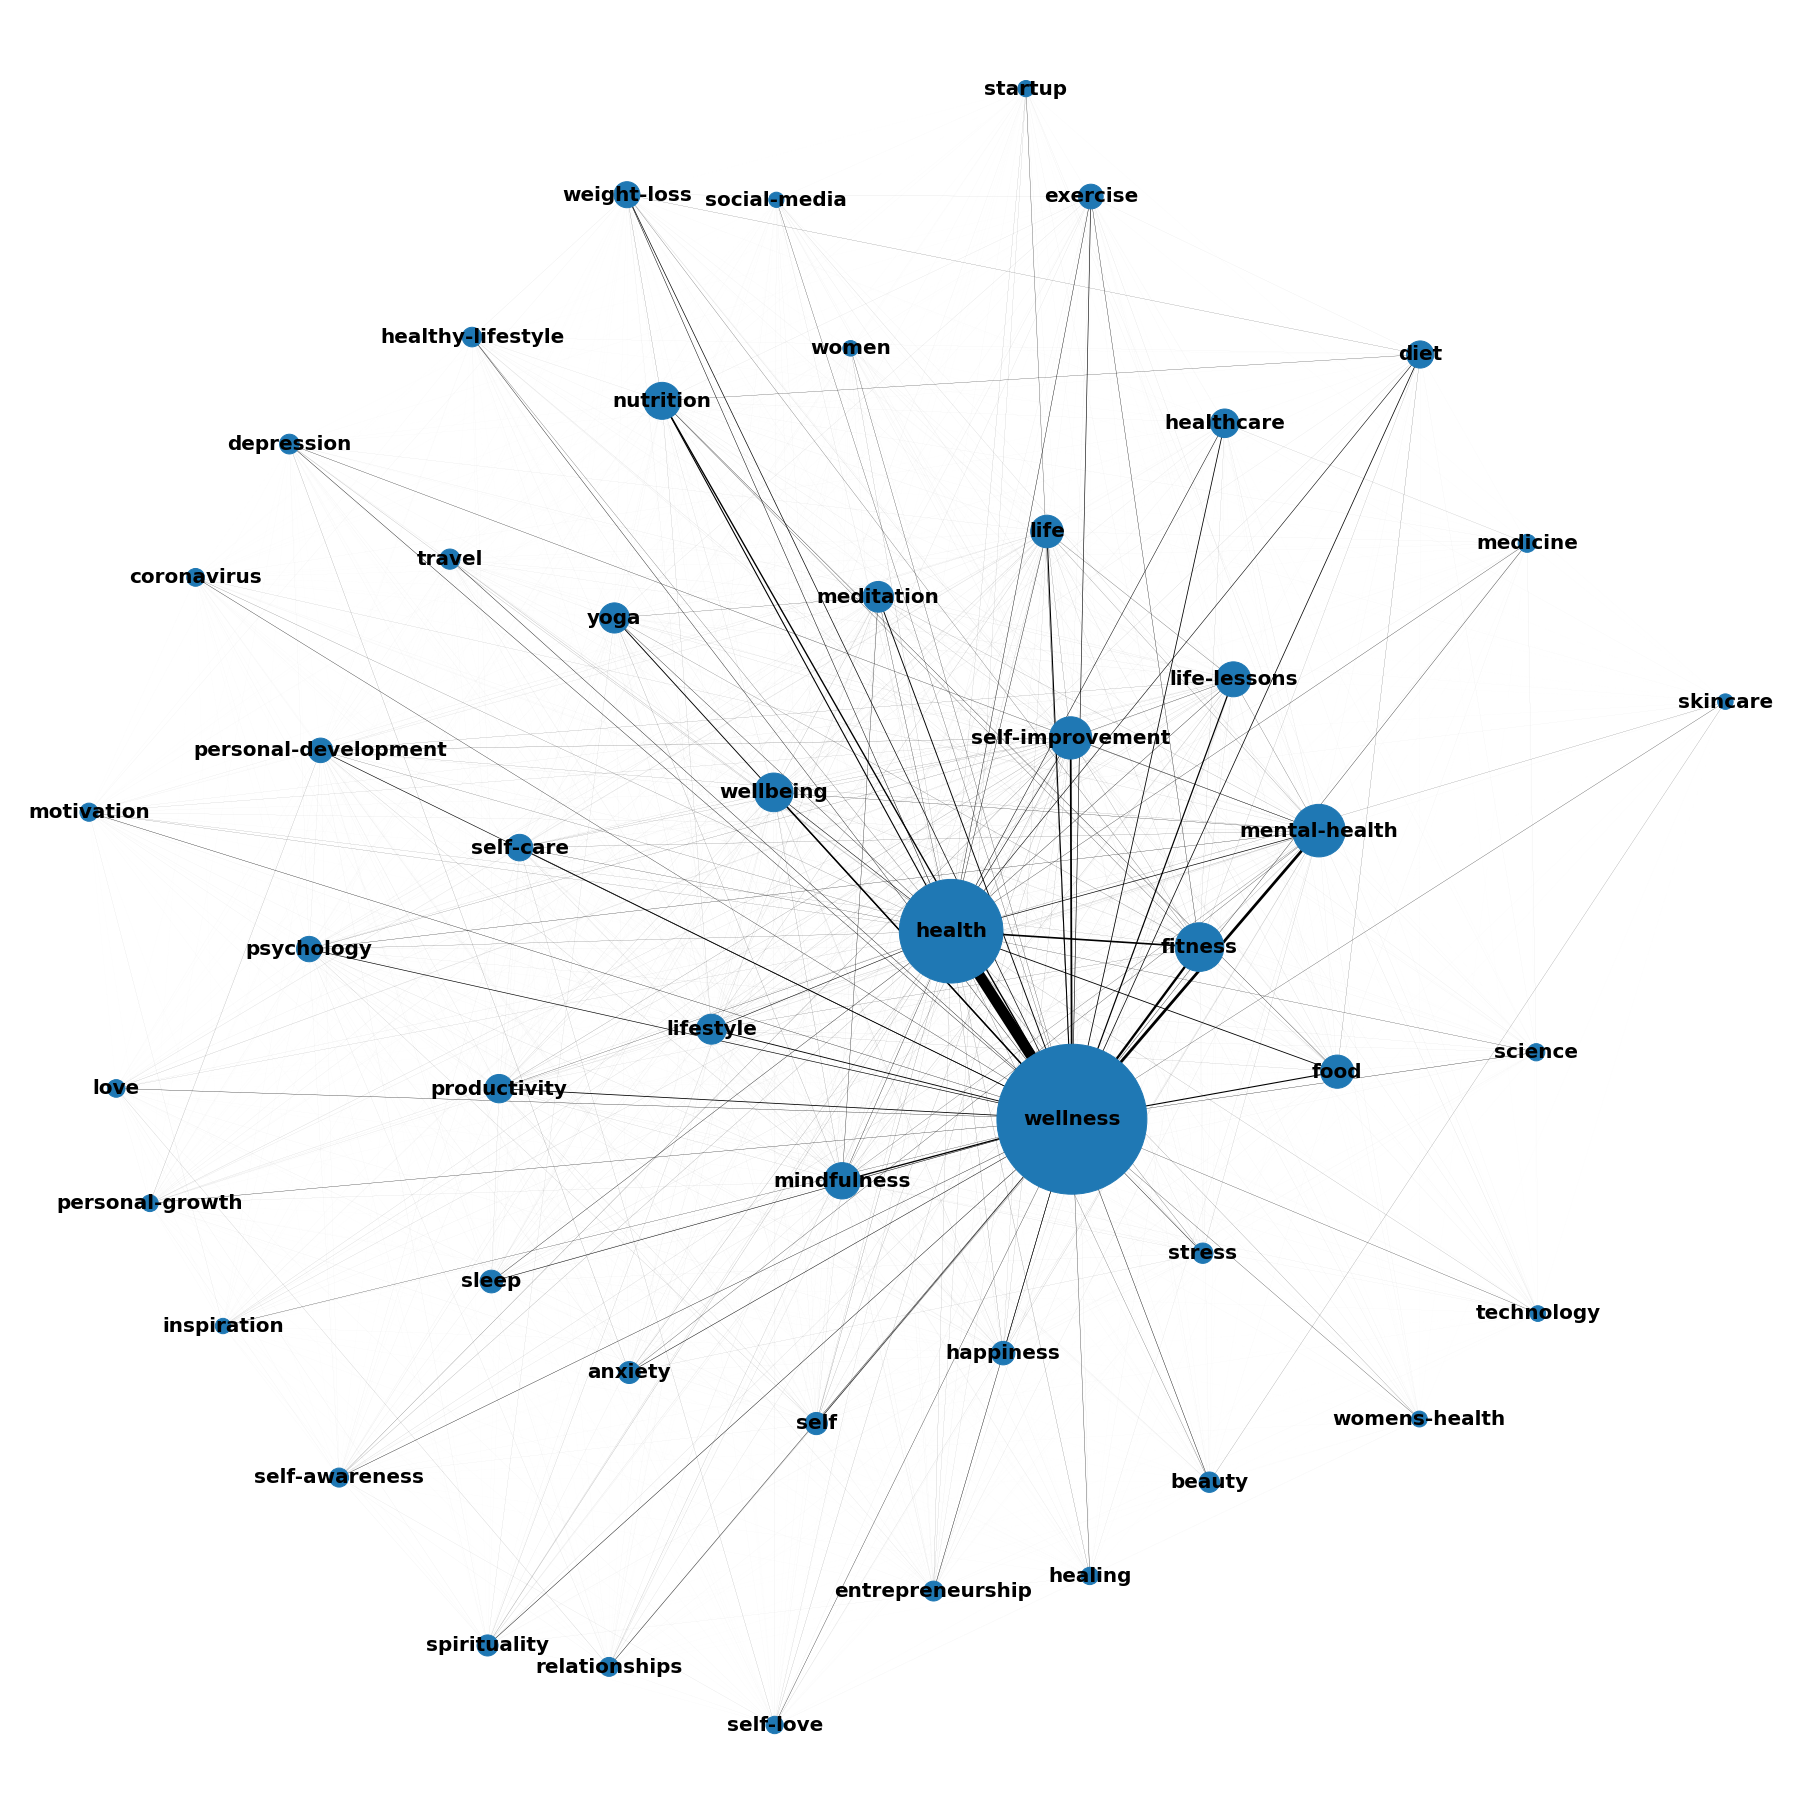

In [68]:

plt.figure(figsize=[25,25])
nx.draw_kamada_kawai(G,
        with_labels=True,
        font_weight='bold',
        font_size=20,
       width=[G.edges[edge]['frequency']/1000 for edge in G.edges],
        node_size=[count for count in top_counts],
        weight='frequency')



### exclude 'wellness' and 'health'

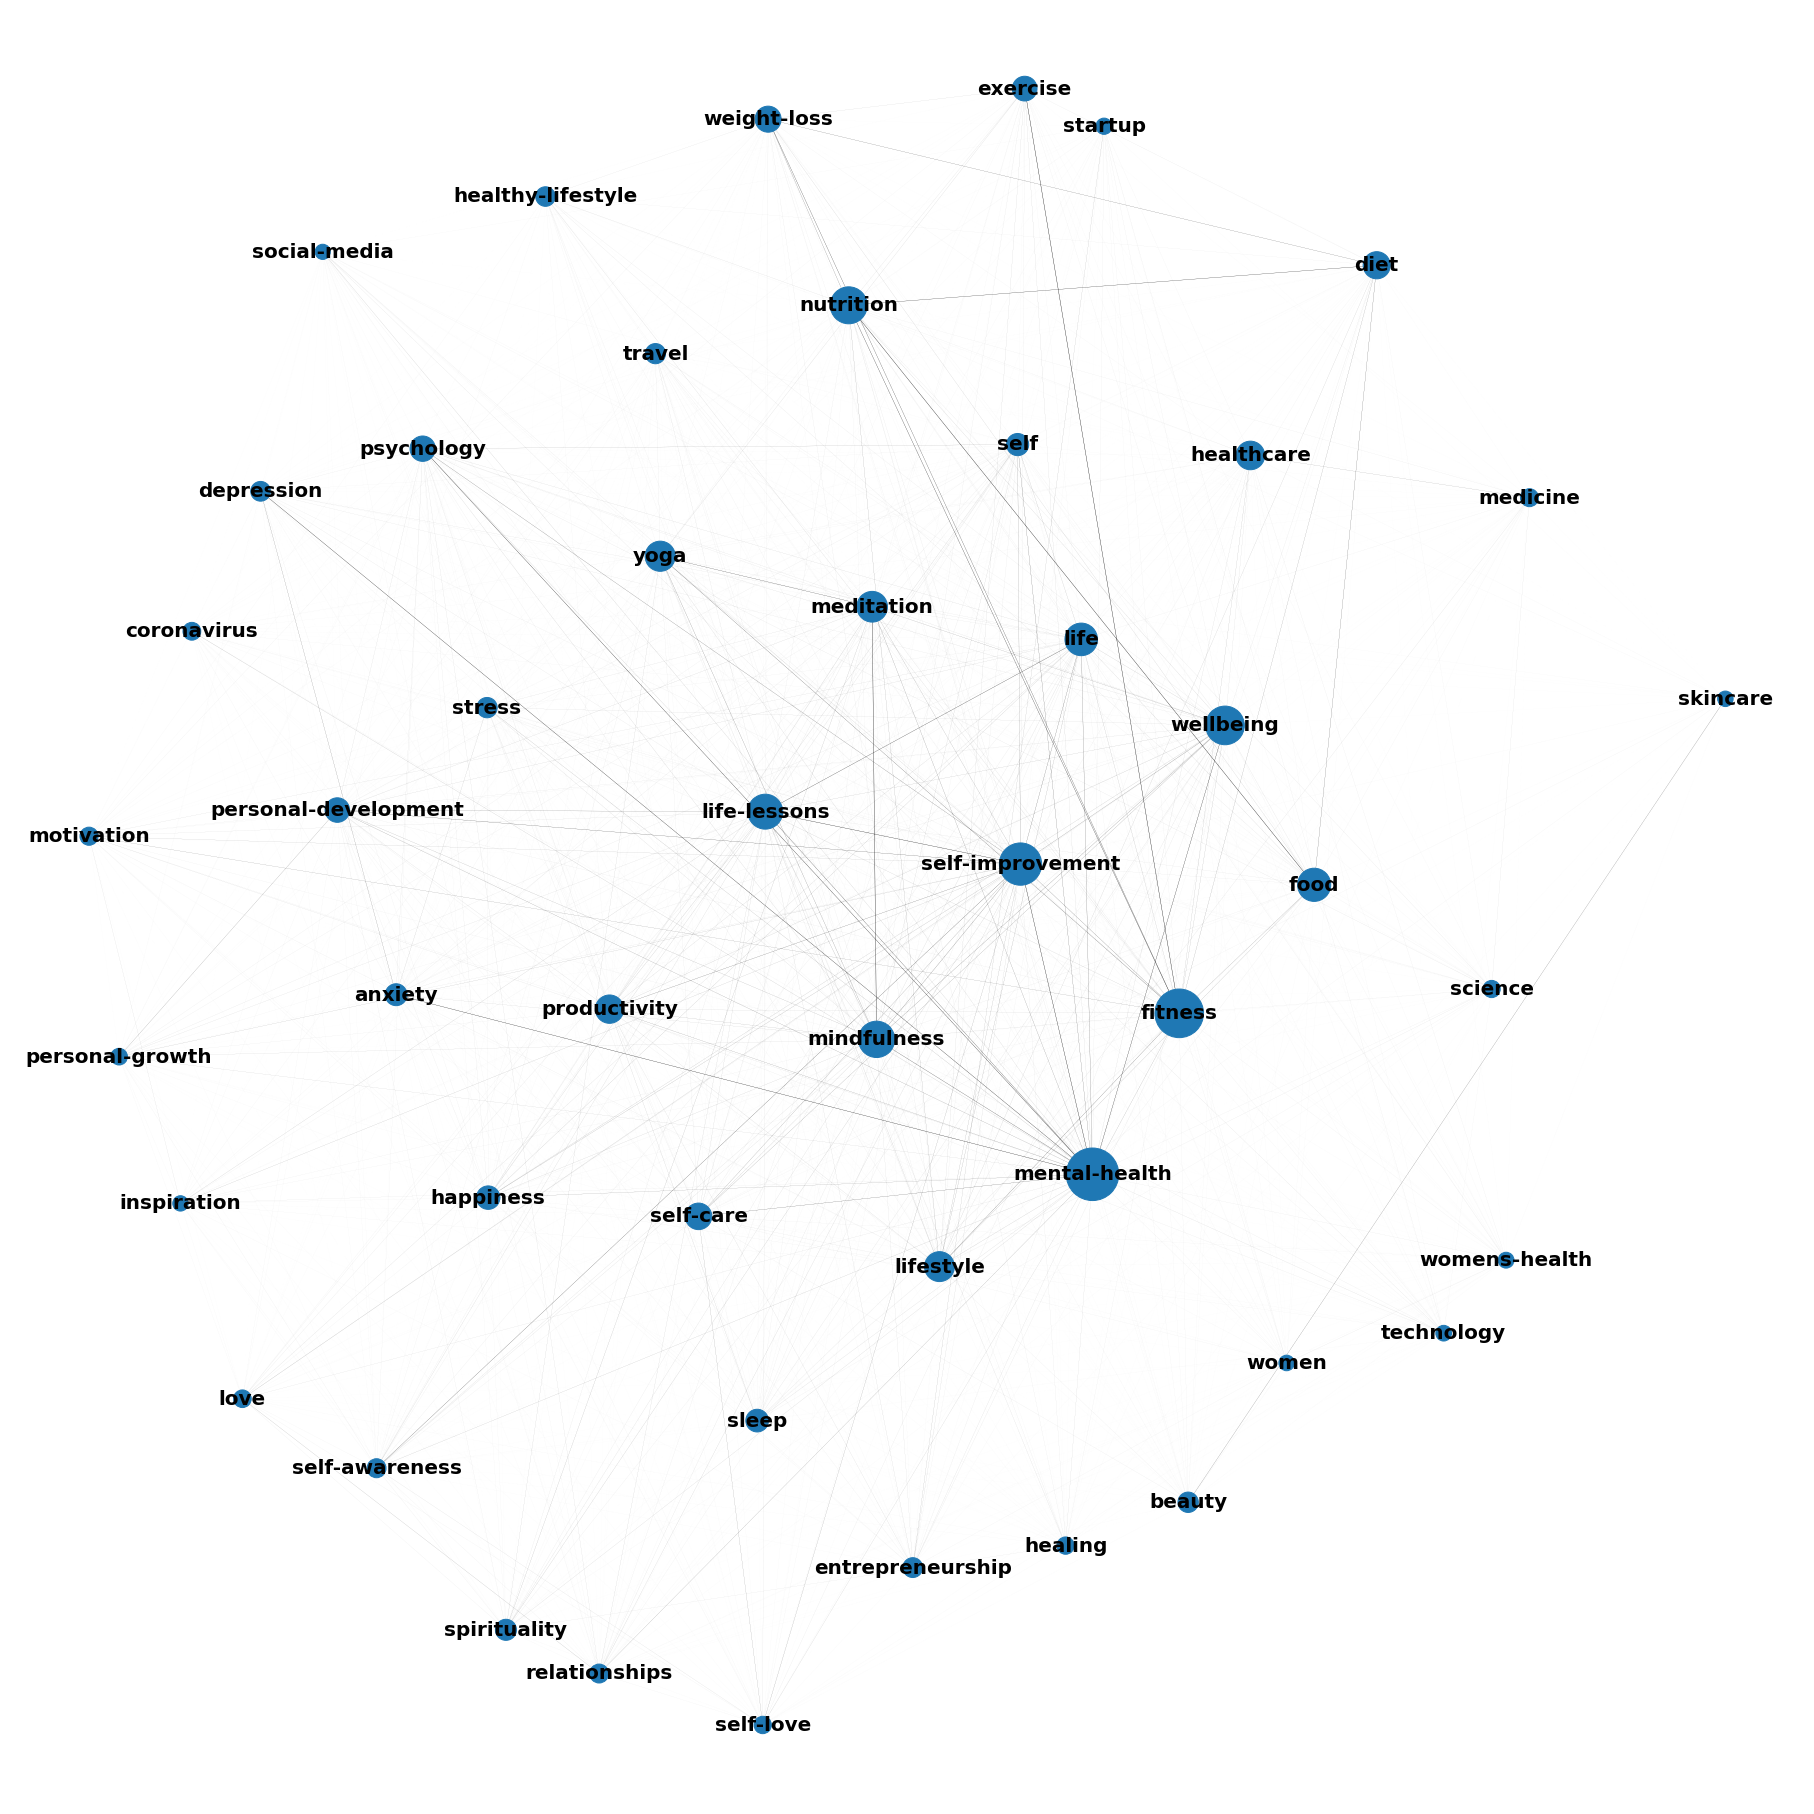

In [87]:
G = nx.Graph()
top_tags_counts_here = top_tags_counts[2:]
top_tags_here = top_tags[2:]
top_counts_here = top_counts[2:]

for tag_count in top_tags_counts_here:
    G.add_node(tag_count[0], size=tag_count[1]/10)

for tag_list in list_of_tags_per_article:
    #keep only tags in top_tags
    tag_list = [tag for tag in tag_list if tag in top_tags_here]
#     print(tag_list)
    if len(tag_list)<2:
        continue
    else:
        combination_of_nodes = list(combinations(tag_list, 2))
        for edge in combination_of_nodes:
            if edge in G.edges:
                G.edges[edge]['frequency']+=1
                G.edges[edge]['inverse']=1/G.edges[edge]['frequency']
            else:
                G.add_edge(*edge, frequency=1, inverse=1)
                
plt.figure(figsize=[25,25])
nx.draw_kamada_kawai(G,
        with_labels=True,
        font_weight='bold',
        font_size=20,
       width=[G.edges[edge]['frequency']/1000 for edge in G.edges],
        node_size=[count for count in top_counts_here],
        weight='frequency')
